## National Institute for Space Research
   <img src="img/icone_cap394.svg" align="right" alt="Drawing" style="width: 200px;"/>
   
#### Project for course  Introduction to Data Science - CAP 394
#### Student: 
* Helvecio Bezerra Leal Neto

#### Instructors: 
* Dr. Gilberto Queiroz 
* Dr. Rafael Santos

## Schedule
     - [x] Data reading
     - [x] Data visualization
     - [ ] Cluster detection algorithm
     - [ ] Preprocessing
     - [ ] Radiosonde data correlation
     - [ ] Final analysis and project elaboration
     

### Index

  [About](#about) <br></br>
  [The Data](#the_data)<br></br>
  [Reading Data](#reading_data)<br></br>
  
  <blockquote>
  <p>
    Esse é um bloco de citação.
    Ele pode ter várias linhas.
  </p>
  <p>Inclusive, uma quebra de linha.</p>
</blockquote>
  

<a id='about'></a>
## About

<a id='the_data'></a>
## The Data

The data analyzed in this example consists of NC (NetCDF4) files. Each file corresponds to Rain Rate measurements collected by the Amazon Protection System (SIPAM) radar during the GoAmazon experiment periods, starting from January 2014 to December 2015, such files contain data on 12-minute time intervals.

https://www.arm.gov/research/campaigns/amf2014goamazon

<a id='reading_data'></a>
## Reading Data

#### 1.1 - Libraries used

In [7]:
import numpy as np
import xarray as xr
import warnings
import pandas as pd
import re

warnings.filterwarnings('ignore')
%matplotlib inline

#### 1.2 - Data Reading

In [229]:
## NC Files from SIPAM RADAR
xds = xr.open_dataset('data/sbmn_rain_rates_20140301_001210.nc')
## Radiosonde files
df = pd.read_csv('data/RG1_T3_rr_byHour.txt', sep="\s+", header=None,names=['year','month','day','hour','null','null2','value'])

### Variáveis presentes no conjunto de dados

In [217]:
xds.data_vars

Data variables:
    start_time  datetime64[ns] ...
    stop_time   datetime64[ns] ...
    lat0        (y0, x0) float32 ...
    lon0        (y0, x0) float32 ...
    rain_rate   (y0, x0) float32 ...

In [230]:
rr = xds.rain_rate                  ### Matriz com valores de preciptacao
runit = xds.rain_rate.units         ### Unidade mm/h
rkm = xds.rain_rate.height_km       ### Unidade de altitude km
start_time = xds.start_time.data    ### Tempo inical
stop_time = xds.stop_time.data      ### Tempo Final
lon = xds.lon0.data                 ### Matriz Longitude
lat = xds.lat0.data                 ### Matriz

In [219]:
# Radiosonde variables
df.head()

,year,month,day,hour,null,null2,value
0,2014.0,1.0,3.0,22.0,0.0,0.0,1.270
1,2014.0,1.0,4.0,15.0,0.0,0.0,0.254
2,2014.0,1.0,5.0,19.0,0.0,0.0,5.842
3,2014.0,1.0,5.0,20.0,0.0,0.0,3.048
4,2014.0,1.0,6.0,9.0,0.0,0.0,0.254


In [220]:
agreg = df.groupby(['month']).agg(['sum'])

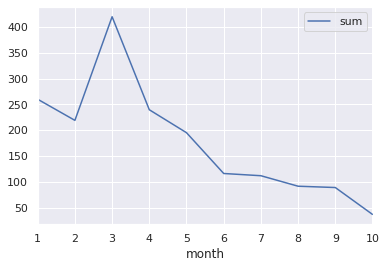

In [221]:
agreg['value'].plot()

<Figure size 576x576 with 0 Axes>

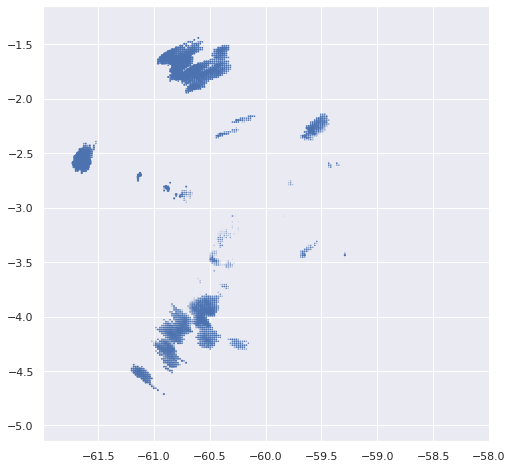

In [231]:
plt.figure(figsize=(8,8))
plt.scatter(lon,lat,rr)
plt.savefig('image02')

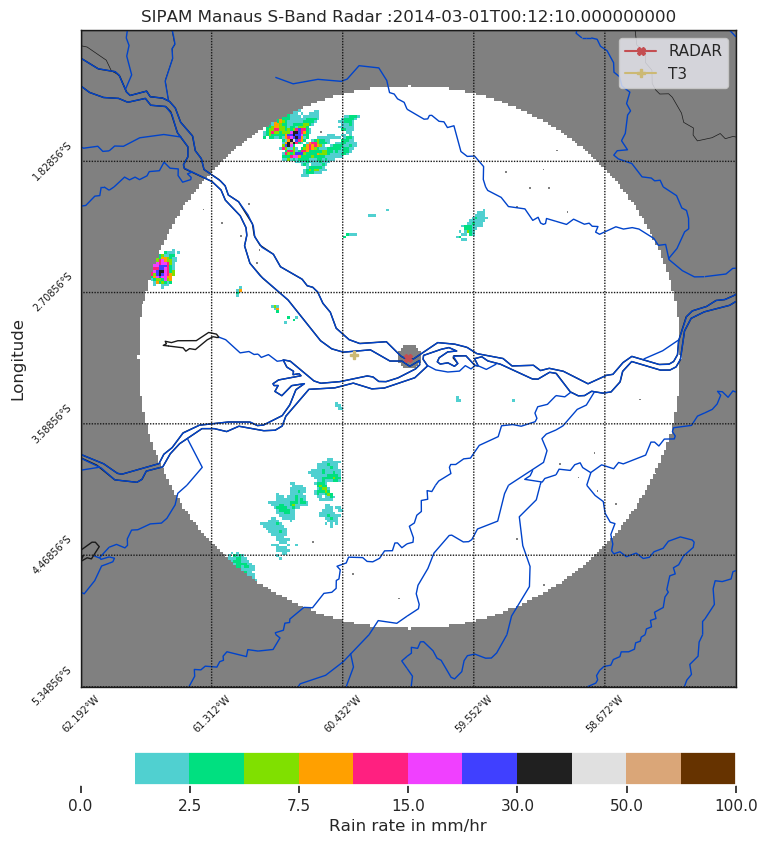

<Figure size 432x288 with 0 Axes>

In [233]:
from lib.radar_plot import radar_plot
img = radar_plot(rr=rr,runit=runit,lat=lat,lon=lon,start_time=start_time,stop_time=stop_time)
plt.savefig('radar1')

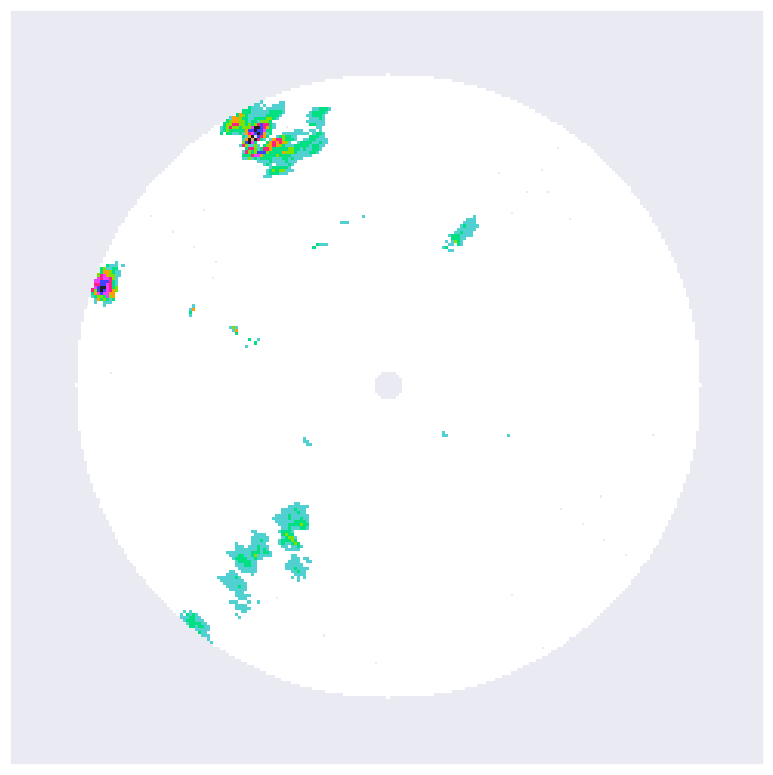

In [234]:
from mpl_toolkits.basemap import Basemap
import matplotlib.colors as mcolors

my_coords = [-3.148556, -59.992000]     ## RADAR T1 SIPAM COORDS
zoom_scale = 2.2                        ## ZOOM SCALE

fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(10,10),dpi=100)

clevs = [0, 1, 2.5, 5, 7.5, 10, 15, 20, 30, 40,
             50, 70, 100]

cmap_data = [(1.0, 1.0, 1.0),
                (0.3137255012989044, 0.8156862854957581, 0.8156862854957581),
                (0.0, 1.0, 1.0),
                (0.0, 0.8784313797950745, 0.501960813999176),
                (0.0, 0.7529411911964417, 0.0),
                (0.501960813999176, 0.8784313797950745, 0.0),
                (1.0, 1.0, 0.0),
                (1.0, 0.6274510025978088, 0.0),
                (1.0, 0.0, 0.0),
                (1.0, 0.125490203499794, 0.501960813999176),
                (0.9411764740943909, 0.250980406999588, 1.0),
                (0.501960813999176, 0.125490203499794, 1.0),
                (0.250980406999588, 0.250980406999588, 1.0),
                (0.125490203499794, 0.125490203499794, 0.501960813999176),
                (0.125490203499794, 0.125490203499794, 0.125490203499794),
                (0.501960813999176, 0.501960813999176, 0.501960813999176),
                (0.8784313797950745, 0.8784313797950745, 0.8784313797950745),
                (0.9333333373069763, 0.8313725590705872, 0.7372549176216125),
                (0.8549019694328308, 0.6509804129600525, 0.47058823704719543),
                (0.6274510025978088, 0.42352941632270813, 0.23529411852359772),
                (0.4000000059604645, 0.20000000298023224, 0.0)]

cmap = mcolors.ListedColormap(cmap_data, 'precipitation')
norm = mcolors.BoundaryNorm(clevs, cmap.N)
ax = axes


bbox = [my_coords[0]-zoom_scale,my_coords[0]+zoom_scale,\
            my_coords[1]-zoom_scale,my_coords[1]+zoom_scale]

m = Basemap(projection='merc',llcrnrlat=bbox[0],urcrnrlat=bbox[1],\
                llcrnrlon=bbox[2],urcrnrlon=bbox[3],lat_ts=10,resolution='i')

xi, yi = m(lon, lat)

cs = m.pcolormesh(xi,yi,rr, cmap = cmap, norm = norm, ax=ax)
#m.drawmapboundary(fill_color='gray')
plt.savefig('image02')

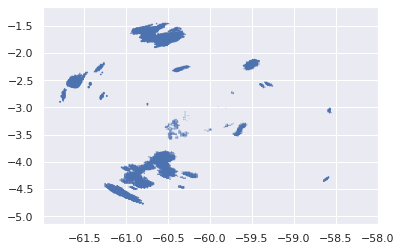

In [213]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)

rdata = np.nan_to_num(rr)

kmeans.fit(rdata)
y_kmeans = kmeans.predict(rdata)

#plt.scatter(lat, lon , c = y_kmeans)
y_kmeans.shape

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

(241,)

### References


In [215]:
!conda install -y opencv

Solving environment: failed
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.7.5
  latest version: 4.7.10

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/mastercontrol/miniconda3/envs/cap394

  added / updated specs:
    - opencv


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ffmpeg-3.4.1               |                0        61.1 MB  conda-forge
    graphite2-1.3.13           |    hf484d3e_1000         109 KB  conda-forge
    harfbuzz-1.9.0             |    he243708_1001         957 KB  conda-forge
    jasper-1.900.1             |                4         275 KB  conda-forge
    libprotobuf-3.4.1          |       h5b8497f_0         2.4 MB
    libtiff-4.0.9              |       he6b73bb_1         521 KB  conda-forge
    opencv-3.3.1               |   p

In [214]:
import numpy as np
import cv2 as cv
cap = cv.VideoCapture('slow.flv')
# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )
# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 0.03))
# Create some random colors
color = np.random.randint(0,255,(100,3))
# Take first frame and find corners in it
ret, old_frame = cap.read()
old_gray = cv.cvtColor(old_frame, cv.COLOR_BGR2GRAY)
p0 = cv.goodFeaturesToTrack(old_gray, mask = None, **feature_params)
# Create a mask image for drawing purposes
mask = np.zeros_like(old_frame)
while(1):
    ret,frame = cap.read()
    frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    # calculate optical flow
    p1, st, err = cv.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
    # Select good points
    good_new = p1[st==1]
    good_old = p0[st==1]
    # draw the tracks
    for i,(new,old) in enumerate(zip(good_new,good_old)):
        a,b = new.ravel()
        c,d = old.ravel()
        mask = cv.line(mask, (a,b),(c,d), color[i].tolist(), 2)
        frame = cv.circle(frame,(a,b),5,color[i].tolist(),-1)
    img = cv.add(frame,mask)
    cv.imshow('frame',img)
    k = cv.waitKey(30) & 0xff
    if k == 27:
        break
    # Now update the previous frame and previous points
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1,1,2)
cv.destroyAllWindows()
cap.release()


ModuleNotFoundError: No module named 'cv2'